# Category 1: Linear Discriminant Analysis (LDA)

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score

from imblearn.over_sampling import SMOTE
from collections import Counter

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

from matplotlib import pyplot as plt

2023-07-06 21:57:37.382323: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 21:57:37.434866: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 21:57:37.436178: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 21:57:38.380411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
credit_risk = pd.read_csv("UCI_Credit_Card.csv")
credit_risk = credit_risk.iloc[:200]

#Process data
credit_risk['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
credit_risk['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
# Independnet features
X = credit_risk.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = credit_risk['default.payment.next.month']

print("Data about Credit risk analysis:")
credit_risk.head()

Data about Credit risk analysis:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
scaler= StandardScaler()
X= scaler.fit_transform(X)

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 124, 1: 36})
After oversampling:  Counter({1: 124, 0: 124})


In [4]:
parameters1 = {'shrinkage':[0.3, 0.5, 0.7], 'priors':[[0.7,0.3], [0.5,0.5]]}
lda = LinearDiscriminantAnalysis(solver='lsqr')
clf = GridSearchCV(lda, parameters1, scoring='precision')
clf.fit(X_train, y_train)
cv_results = pd.DataFrame(clf.cv_results_)
print("Results from grid search (cross-validation) to tune hyperparameters:")
cv_results

Results from grid search (cross-validation) to tune hyperparameters:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_shrinkage,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002683,0.000419,0.002331,0.000489,"[0.7, 0.3]",0.3,"{'priors': [0.7, 0.3], 'shrinkage': 0.3}",0.812500,0.842105,0.750000,0.777778,0.714286,0.779334,0.045021,3
1,0.002077,0.000389,0.001904,0.000139,"[0.7, 0.3]",0.5,"{'priors': [0.7, 0.3], 'shrinkage': 0.5}",0.857143,0.777778,0.833333,0.764706,0.785714,0.803735,0.035356,1
2,0.002253,0.000335,0.002262,0.000410,"[0.7, 0.3]",0.7,"{'priors': [0.7, 0.3], 'shrinkage': 0.7}",0.846154,0.789474,0.800000,0.750000,0.785714,0.794268,0.030922,2
3,0.002156,0.000217,0.002103,0.000630,"[0.5, 0.5]",0.3,"{'priors': [0.5, 0.5], 'shrinkage': 0.3}",0.655172,0.769231,0.741935,0.750000,0.739130,0.731094,0.039391,4
4,0.002194,0.000198,0.002048,0.000357,"[0.5, 0.5]",0.5,"{'priors': [0.5, 0.5], 'shrinkage': 0.5}",0.633333,0.714286,0.727273,0.774194,0.680000,0.705817,0.047176,5
5,0.002083,0.000236,0.001899,0.000122,"[0.5, 0.5]",0.7,"{'priors': [0.5, 0.5], 'shrinkage': 0.7}",0.625000,0.700000,0.676471,0.724138,0.666667,0.678455,0.033321,6


## Illustration:

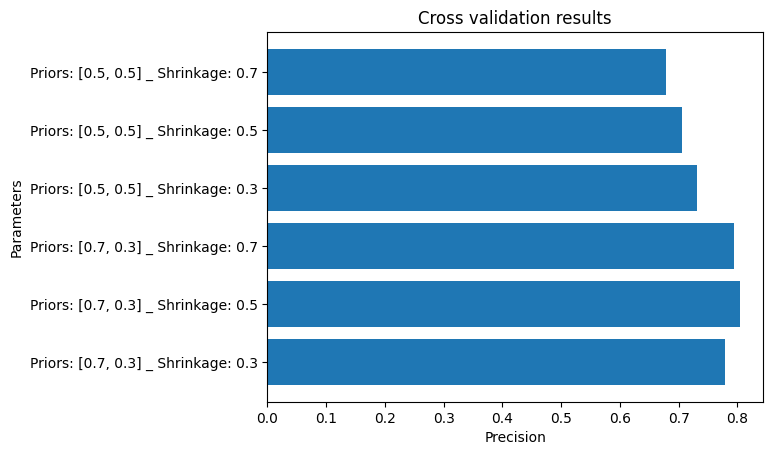

In [5]:
index = ['Priors: {} _ Shrinkage: {}'.format(str(x), y) for x, y in zip(cv_results["param_priors"], cv_results["param_shrinkage"])]
plt.barh(index, cv_results["mean_test_score"])
plt.title("Cross validation results")
plt.xlabel("Precision")
plt.ylabel("Parameters")
plt.show()

In [6]:
predicted = clf.predict(X_test)
print('Precision rate on the test dataset: {}'.format(precision_score(y_test, predicted)))

Precision rate on the test dataset: 0.25


In [7]:
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test, predicted)))

Confusion matrix: 
 [[24  6]
 [ 8  2]]


# Category 2: Support Vector Machines (SVM)

In [8]:
parameters2 = {'kernel':('linear','rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters2, scoring='precision')
clf.fit(X_train, y_train)
cv_results = pd.DataFrame(clf.cv_results_)
print("Results from grid search (cross-validation) to tune hyperparameters:")
cv_results

Results from grid search (cross-validation) to tune hyperparameters:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005626,0.001149,0.002391,0.000386,1,linear,"{'C': 1, 'kernel': 'linear'}",0.777778,0.750000,0.793103,0.806452,0.772727,0.780012,0.019127,4
1,0.002990,0.000209,0.002504,0.000229,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.800000,0.730769,0.840000,0.827586,0.769231,0.793517,0.039725,2
2,0.026408,0.006383,0.002543,0.000309,10,linear,"{'C': 10, 'kernel': 'linear'}",0.741935,0.785714,0.785714,0.806452,0.782609,0.780485,0.021069,3
3,0.003495,0.000125,0.002737,0.000883,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.851852,0.846154,0.857143,0.862069,0.793103,0.842064,0.025049,1


## Illustration:

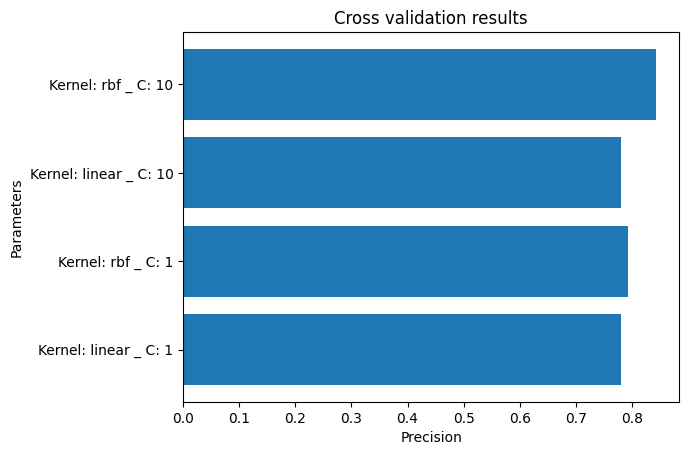

In [9]:
index = ['Kernel: {} _ C: {}'.format(x, y) for x, y in zip(cv_results["param_kernel"], cv_results["param_C"])]
plt.barh(index, cv_results["mean_test_score"])
plt.title("Cross validation results")
plt.xlabel("Precision")
plt.ylabel("Parameters")
plt.show()

In [10]:
predicted = clf.predict(X_test)
print('Precision rate on the test dataset: {}'.format(precision_score(y_test, predicted)))

Precision rate on the test dataset: 0.0


In [11]:
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test, predicted)))

Confusion matrix: 
 [[20 10]
 [10  0]]


# Category 3: Neural Networks

## Computation:

In [12]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_shape=(24,), activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision()])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# create model
nn = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50]
param3 = dict(batch_size=batch_size, epochs=epochs)
clf = GridSearchCV(estimator= nn, param_grid=param3, n_jobs=-1)
clf_result = clf.fit(X_train, y_train)
cv_results = pd.DataFrame(clf.cv_results_)
print("Results from grid search (cross-validation) to tune hyperparameters:")
cv_results

2023-07-06 21:57:41.987059: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 21:57:42.015912: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 21:57:42.042547: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 21:57:42.056130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 21:57:42.077897: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 21:57:42.079002: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-

2023-07-06 21:57:44.065151: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-06 21:57:44.199032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-06 21:57:45.284101: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-06 21:57:45.285480: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-07-06 21:57:4

2023-07-06 21:57:45.983561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-06 21:57:45.985236: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-07-06 21:57:54.096156: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/t

Results from grid search (cross-validation) to tune hyperparameters:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.649994,0.266927,0.258238,0.012576,10,10,"{'batch_size': 10, 'epochs': 10}",0.68,0.78,0.80,0.734694,0.510204,0.700980,0.103944,5
1,5.564623,0.905666,0.245833,0.028826,10,50,"{'batch_size': 10, 'epochs': 50}",0.82,0.84,0.82,0.795918,0.836735,0.822531,0.015671,1
2,2.012599,0.151314,0.218578,0.038595,20,10,"{'batch_size': 20, 'epochs': 10}",0.66,0.76,0.68,0.755102,0.877551,0.746531,0.076596,4
3,3.403875,0.597017,0.152174,0.011084,20,50,"{'batch_size': 20, 'epochs': 50}",0.80,0.74,0.88,0.836735,0.755102,0.802367,0.051647,2
4,1.531846,0.057024,0.144503,0.015256,40,10,"{'batch_size': 40, 'epochs': 10}",0.56,0.70,0.62,0.530612,0.571429,0.596408,0.059273,6
5,1.794129,0.032983,0.118221,0.022523,40,50,"{'batch_size': 40, 'epochs': 50}",0.76,0.70,0.68,0.836735,0.775510,0.750449,0.055987,3


## Illustration:

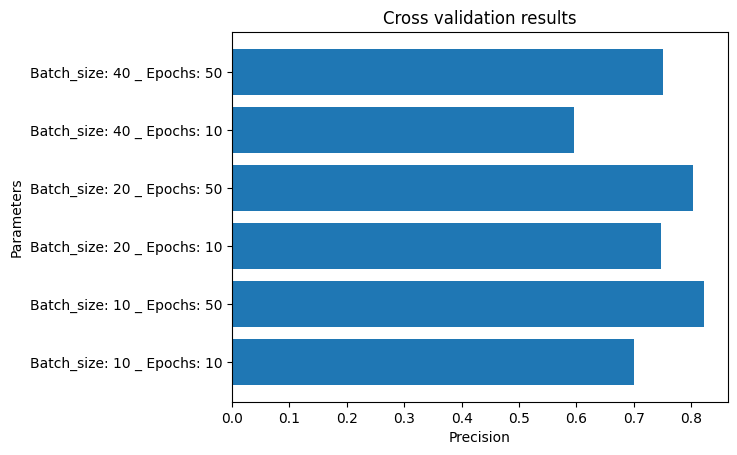

In [13]:
index = ['Batch_size: {} _ Epochs: {}'.format(x, y) for x, y in zip(cv_results["param_batch_size"], cv_results["param_epochs"])]
plt.barh(index, cv_results["mean_test_score"])
plt.title("Cross validation results")
plt.xlabel("Precision")
plt.ylabel("Parameters")
plt.show()

In [14]:
predicted = clf.predict(X_test)
print('Precision rate on the test dataset: {}'.format(precision_score(y_test, predicted)))

Precision rate on the test dataset: 0.1875


In [15]:
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test, predicted)))

Confusion matrix: 
 [[17 13]
 [ 7  3]]


# Category 4: Stacking

In [16]:
#LDA
lda = LinearDiscriminantAnalysis(solver='lsqr')

#SVM
svc = SVC()

#Neural network
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_shape=(24,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision()])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# create model
nn = KerasClassifier(model=create_model, verbose=0, batch_size=5, epochs=10)
nn._estimator_type = "classifier" #to use stacking classifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=3, random_state=42)),
    ('lda', lda),
    ('svc', svc),
    ('nn', nn)
    
]

params = {'lda__shrinkage':[0.3, 0.5, 0.7], 'lda__priors':[[0.7,0.3], [0.5,0.5]],
          'svc__kernel':('linear','rbf'), 'svc__C':[1, 10]
         }

model = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf = make_pipeline(StandardScaler(), GridSearchCV(estimator=model, param_grid=params, cv=5))
clf_result = clf.fit(X_train, y_train)
print("Results from grid search (cross-validation) to tune hyperparameters:")
pd.DataFrame(clf_result.named_steps['gridsearchcv'].cv_results_)

Results from grid search (cross-validation) to tune hyperparameters:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lda__priors,param_lda__shrinkage,param_svc__C,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.745745,0.813349,0.094077,0.011193,"[0.7, 0.3]",0.3,1,linear,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.76,0.88,0.86,0.897959,0.857143,0.851020,0.047845,16
1,7.198867,0.366062,0.095335,0.010125,"[0.7, 0.3]",0.3,1,rbf,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.82,0.82,0.84,0.877551,0.836735,0.838857,0.021044,21
2,6.751226,0.885859,0.146334,0.132401,"[0.7, 0.3]",0.3,10,linear,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.78,0.88,0.86,0.877551,0.877551,0.855020,0.038189,11
3,5.497627,0.262876,0.071928,0.010245,"[0.7, 0.3]",0.3,10,rbf,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.86,0.90,0.92,0.938776,0.897959,0.903347,0.026274,1
4,5.476944,0.310735,0.070637,0.005810,"[0.7, 0.3]",0.5,1,linear,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.78,0.88,0.86,0.877551,0.857143,0.850939,0.036622,17
5,5.796128,0.399102,0.073992,0.014740,"[0.7, 0.3]",0.5,1,rbf,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.82,0.82,0.84,0.877551,0.857143,0.842939,0.022185,19
6,5.484941,0.290958,0.068735,0.003538,"[0.7, 0.3]",0.5,10,linear,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.78,0.88,0.86,0.877551,0.877551,0.855020,0.038189,11
7,5.895688,0.467081,0.074109,0.008836,"[0.7, 0.3]",0.5,10,rbf,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.86,0.88,0.92,0.938776,0.897959,0.899347,0.027948,3
8,5.862127,0.397902,0.068218,0.003792,"[0.7, 0.3]",0.7,1,linear,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.78,0.90,0.86,0.877551,0.857143,0.854939,0.040468,14
9,6.041862,0.420638,0.083693,0.010231,"[0.7, 0.3]",0.7,1,rbf,"{'lda__priors': [0.7, 0.3], 'lda__shrinkage': ...",0.82,0.82,0.82,0.857143,0.857143,0.834857,0.018196,22


In [17]:
predicted = clf_result.predict(X_test)
print('Precision rate on the test dataset: {}'.format(precision_score(y_test, predicted)))

Precision rate on the test dataset: 0.0


In [18]:
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test, predicted)))

Confusion matrix: 
 [[23  7]
 [10  0]]
